# CNN

##
## Allgemeines:

Tensorflow und Keras kurze Beschreibung

## Einf. NN

## Filter (Kernel) in CNN 
<p style="color:white;background-color:blue;">Anmerkung: (Grundlage zum Anschluss an letzten Termin)</p>

Grundlegend sind Filter quadratische Matritzen, die auf unsere als 2-/3-D Arrays vorliegenden Eingaben (Bilder) angewendet werden. Diese Filter (Kernel) werden als Faltungsmatrix (convolution kernel) und deren Anwendung auf Eingaben als Faltung (bzw. Konvolution) bezeichnet.<br><br>
<p style="color:white;background-color:Tomato;">Vorsicht!<br> Im Englischen wird strikt zwischen *filter* und *kernel* unterschieden.</p> <br>

Diese Verarbeitung bewirkt zwei Eigenschaften:

- **Translationsinvarianz** <br>
    Beim Erlernen bestimmter Muster, können diese auch in anderen Bildausschnitten wiedererkannt werden. Das heißt zum Beispiel, wenn ein CNN die Muster eines Auges in der Bildmitte erlernt hat, wird es diese Muster auch in anderen Bildausschnitten (z.B. am Rand) wiedererkennen.
- **Erkennung räumlicher Hierarchien** <br>
    Da die Layer aufsteigende Muster erkennen (zuerst kleine und dann zunehmend größere) und diese kombinieren, können CNN zunehmend komplexere Objekte erlernen. Dies beruht auf dem natürlichen Prinzip die visuelle Welt hierarchisch aufzubauen.<br>
    
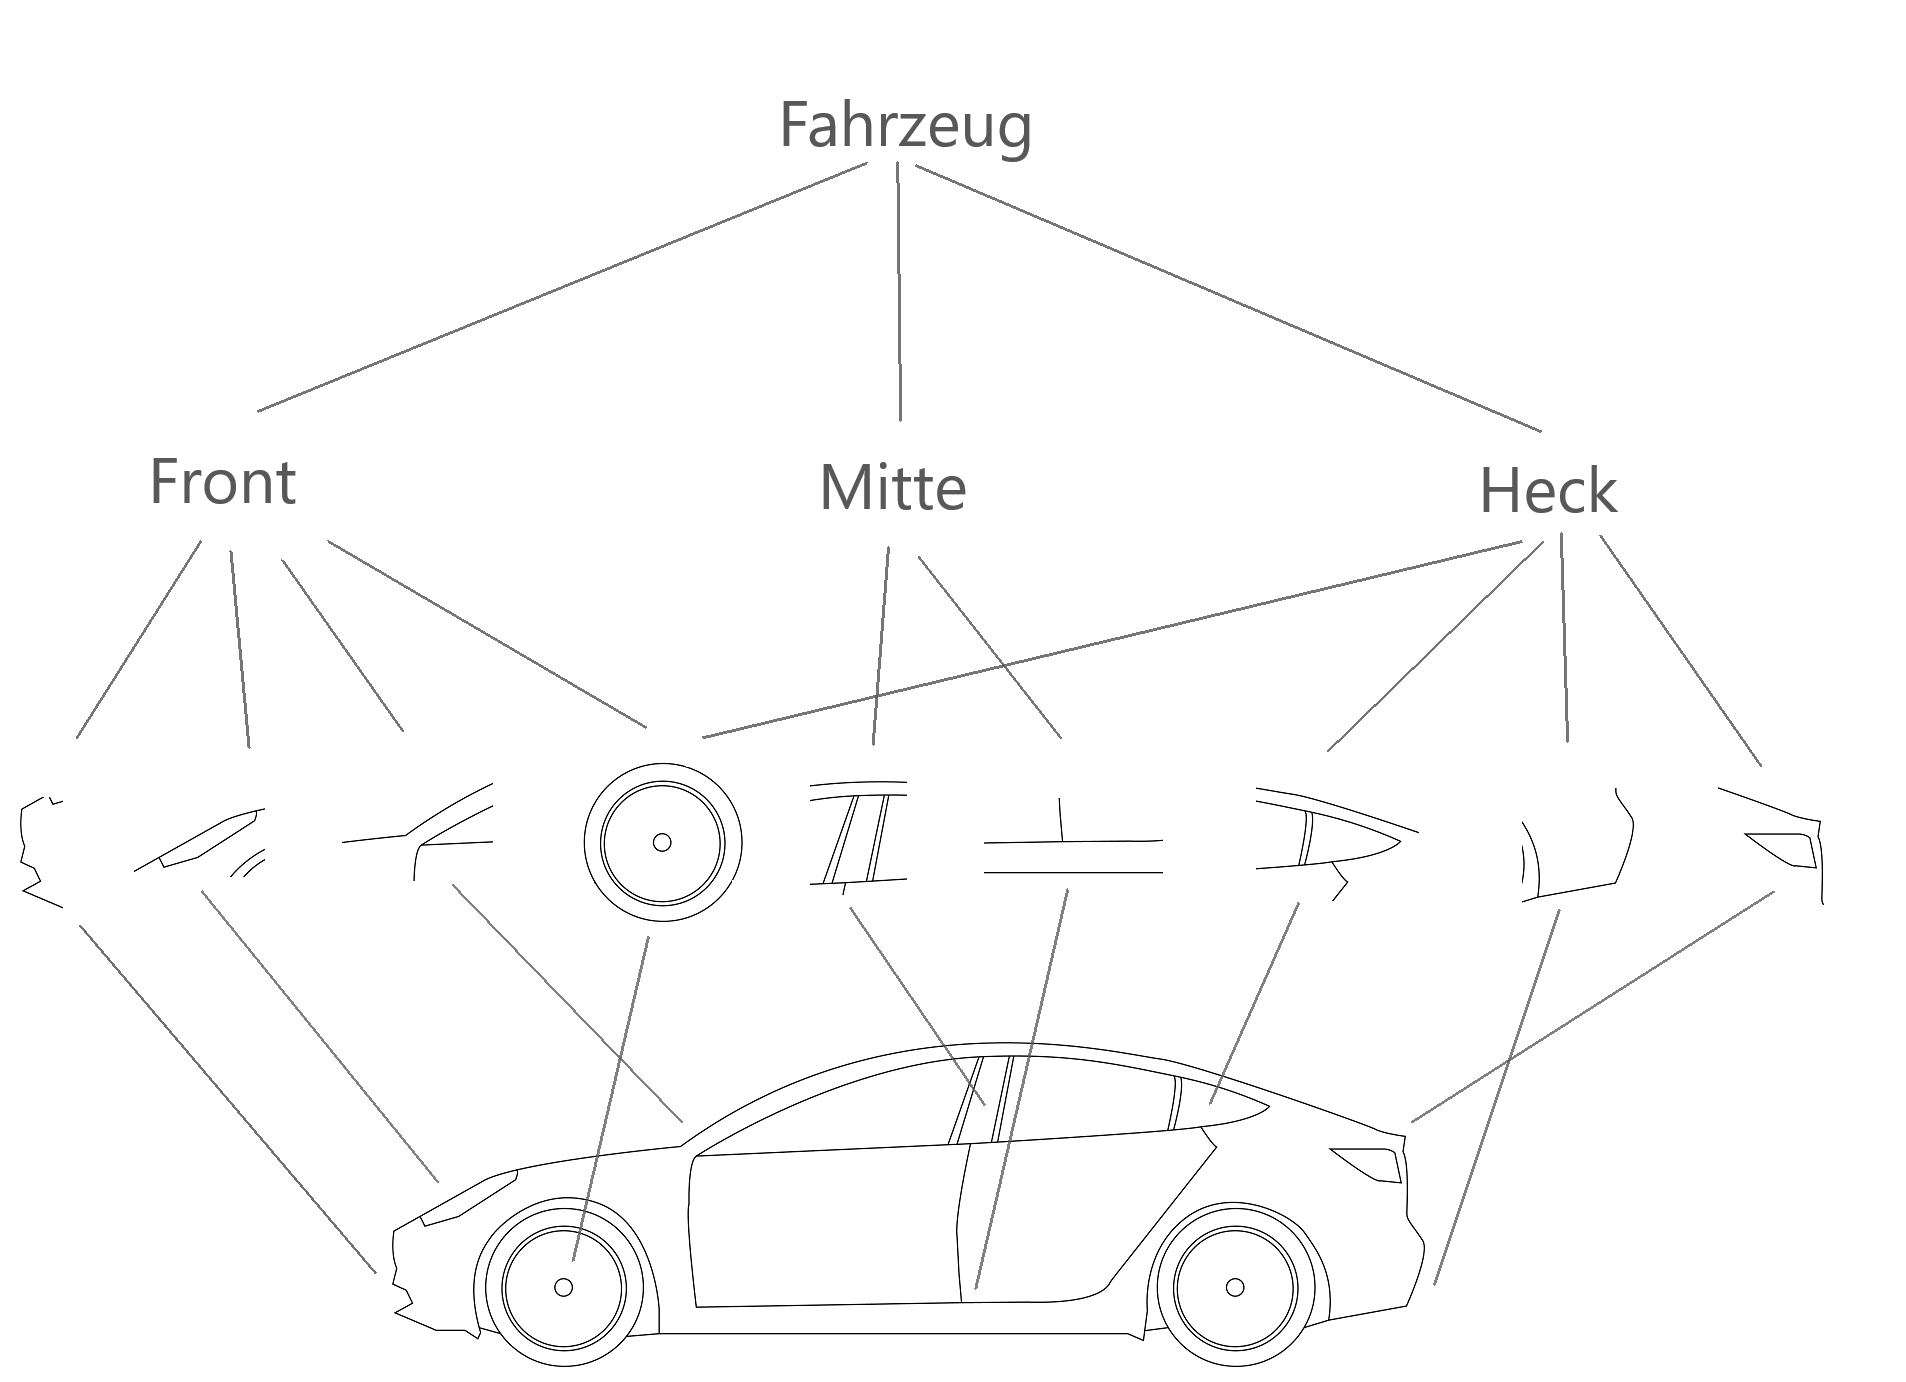

## Unterschiede zum Mehrlagigenm Perzeptron (*Multilayer perceptron*)

Sowas wie Weiterentwicklung
Eingabe Matrix != Vektor
Vor allem für Bilder + Audio

### Layer
#### Aufbau eines Filterkernel (enlg. *kernel*)

In CNN werden unterschiedlich große Filter angewendet.
+ Gewichtung (kernel weight)
+ Größe 3x3 5x5
+ Aktivierungsfunktion, 
    Sigmoid (alt) vergleich zu ReLU(neu)?

#### Pooling
Wirkungsweise
Bsp MaxPooling -> maximale aktivität
#### Dropout
#### Batch normalization
#### Dropout



In [ ]:
s_in_min = 60
s_in_h = s_in_min*60
s_in_d = s_in_h*24

print("Der Tag hat "+ str(s_in_d) + " Sekunden")

## Maschinelles Lernen mit neuronalen Netzen

Hier starten wir mit dem Abschnitt *machine learning*. Dabei verwenden wir die Deep-Learning-Bibliothek **Keras**, welche das **TensorFlow** Framework verwendet.
### Voraussetzungen
Für dieses Notebook wird die Bilderdatenbank **GTSRB** benötigt, welche unter diesem [Link](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html) heruntergeladen werden kann.
Benötigt wird die **GTSRB_Final_Training_Images.zip** für das anlernen des *neuronalen Netzes*.
### Import
Zu Beginn müssen die benötigten Packages importiert werden.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import glob 
import cv2
import os
 
from sklearn.model_selection import train_test_split
from skimage.color import rgb2grey

In [2]:
NUM_CLASSES = 3
np.random.seed(3)

### Vorbereiten der Test- und Trainingdaten
In diesem Abschnitt legen wir fest wo sich die Trainingdateien befinden. Dabei muss der Pfad entsprechend angepasst werden.
Wenn  das Notebook lokal ausgeführt wird, reicht der relative Pfad aus. Bei einer Cloud Ausführung muss der komplette Dateipfad angegeben werden.

In [3]:
# Pfad zu den Trainingsdaten
data_path = "src/GTSRB/Final_Training/Images" #Hier habe ich die .zip im Ordner "src" entpakt und die bestehende Ordnerstruktur genutzt
 
images = []
image_labels = []
 
# Pfade zu den einzelnen Bildern
for i in range(NUM_CLASSES):
    image_path = data_path + "/" + format(i, "05d") + "/"
    for img in glob.glob(image_path + "*.ppm"):
        image = cv2.imread(img)
        image = rgb2grey(image) # Umwandlung in Graustufen
        image = (image / 255.0) # Neu skalieren
        image = cv2.resize(image, (32, 32)) #Größe vereinheitlichen
        images.append(image)
        
        # Erstellung der Label für die Bilder und Transfer in eine Binär-Matrix (1-aus-n-Code)
        labels = np.zeros((NUM_CLASSES, ), dtype=np.float32)
        labels[i] = 1.0
        image_labels.append(labels)
 
images = np.stack([img[:, :, np.newaxis] for img in images], axis=0).astype(np.float32)
image_labels = np.matrix(image_labels).astype(np.float32)



Nun lassen wir us die Form der Bilder anzeigen

[[0. 0. 1.]]
(4530, 32, 32, 1)
4530


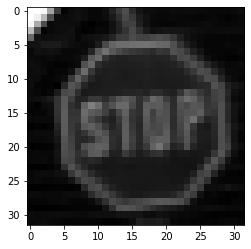

In [10]:
plt.imshow(images[4489, :, :, :].reshape(32, 32), cmap="gray")
print(image_labels[4489, :])

print(images.shape)
print(len(images))

Wir teilen die Testbilder in Traings und Testbilder auf

In [11]:
(train_X, test_X, train_y, test_y) = train_test_split(images, image_labels, 
                                                      test_size=0.2, 
                                                      random_state=3)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(3624, 32, 32, 1)
(3624, 3)
(906, 32, 32, 1)
(906, 3)


### Erstellung des Models
Wir verwenden drei Conv2D() (Dreidimensionale Faltung) Layer mit den Dimensionen 32, 64 und 128. 


In [16]:
model = tf.keras.models.Sequential()
input_shape = (32, 32, 1) # Bilder mit der Auflösung von 32x32 Pixel und Graustufe

model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape, data_format="channels_last"))
model.add(tf.keras.layers.BatchNormalization(axis=-1))      
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
        
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', data_format="channels_last"))
model.add(tf.keras.layers.BatchNormalization(axis=-1))

model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu', data_format="channels_last"))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(3, activation='softmax'))

### Kompilierung

In [17]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])

history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=10)

Train on 3624 samples, validate on 906 samples
Epoch 1/10
3624/3624 [==============================] - 26s 7ms/sample - loss: 0.2598 - accuracy: 0.9200 - val_loss: 2.7269 - val_accuracy: 0.4879
Epoch 2/10
3624/3624 [==============================] - 25s 7ms/sample - loss: 0.0468 - accuracy: 0.9829 - val_loss: 9.3043 - val_accuracy: 0.4879
Epoch 3/10
3624/3624 [==============================] - 25s 7ms/sample - loss: 0.0631 - accuracy: 0.9790 - val_loss: 11.7057 - val_accuracy: 0.4879
Epoch 4/10
3624/3624 [==============================] - 25s 7ms/sample - loss: 0.0327 - accuracy: 0.9906 - val_loss: 2.0948 - val_accuracy: 0.6038
Epoch 5/10
3624/3624 [==============================] - 25s 7ms/sample - loss: 0.0152 - accuracy: 0.9948 - val_loss: 1.4765 - val_accuracy: 0.6711
Epoch 6/10
3624/3624 [==============================] - 25s 7ms/sample - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.2631 - val_accuracy: 0.9018
Epoch 7/10
3624/3624 [==============================] - 25s 7ms/sample

### Diagramm zum Verlust und Genauigkeit

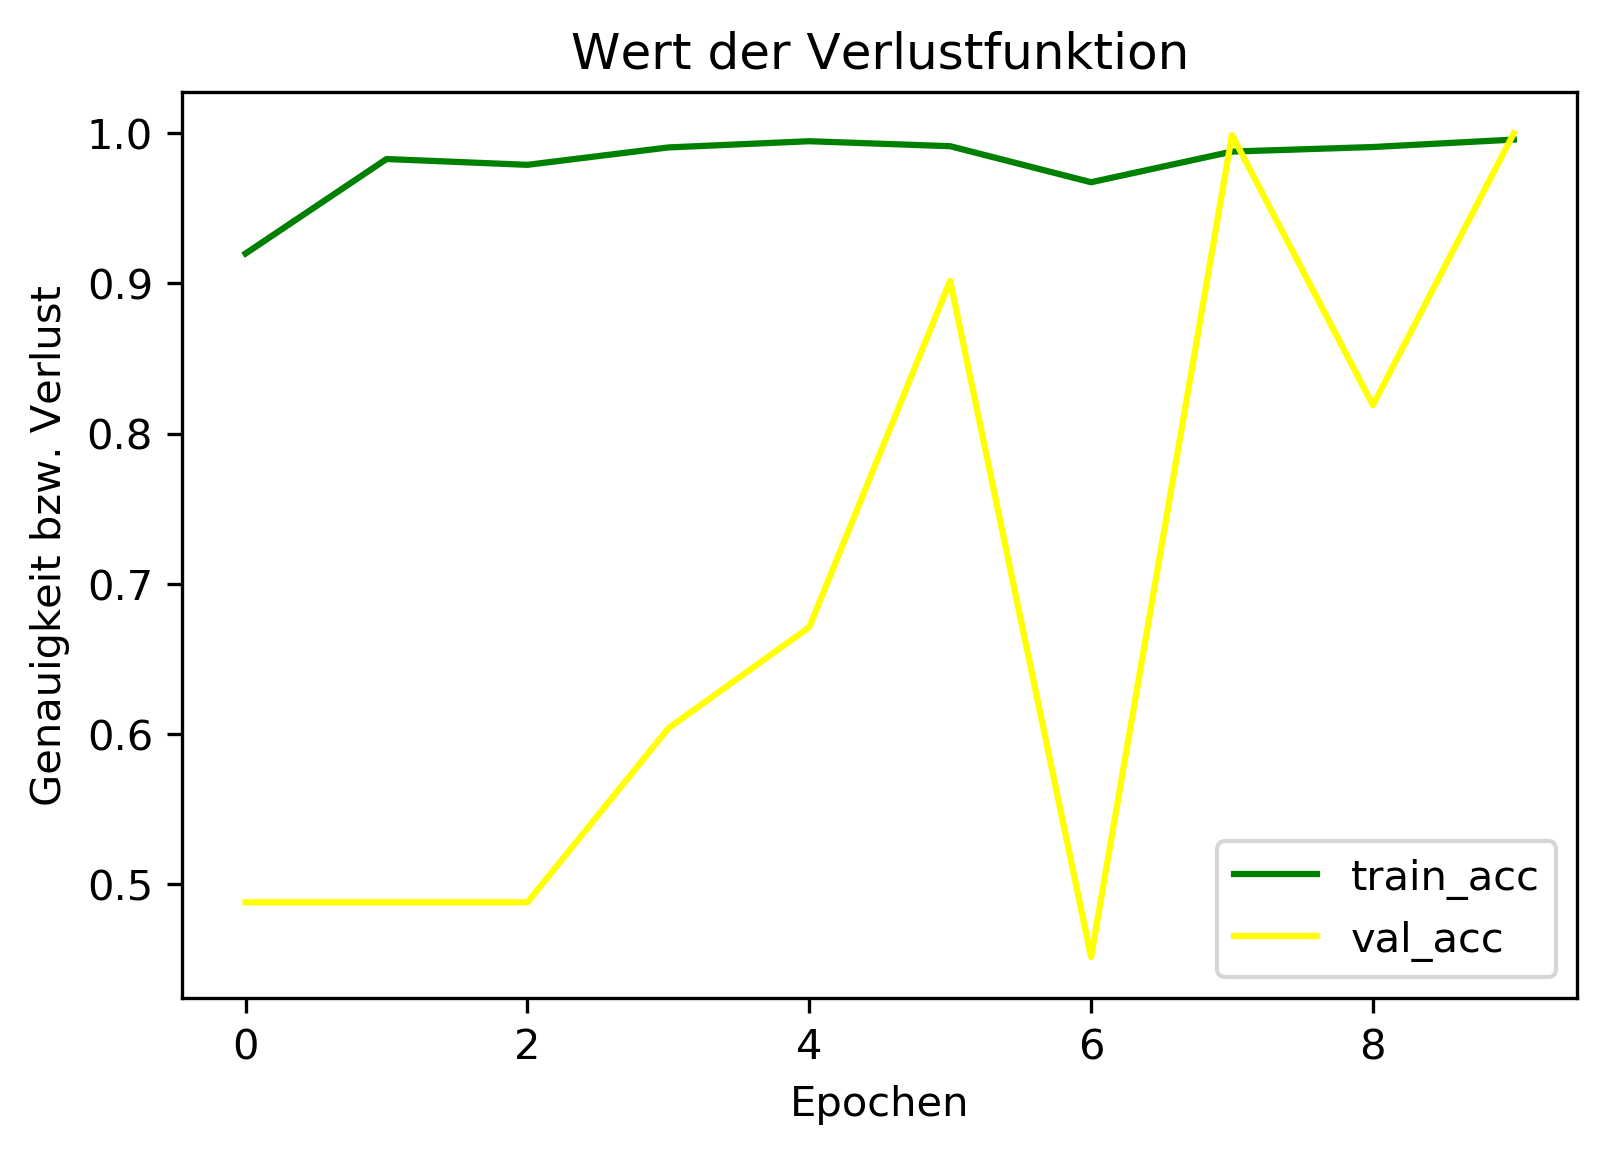

In [22]:
#Plot für Diagramm
num_epochs = np.arange(0, 10)
plt.figure(dpi=300)
#plt.plot(num_epochs, history.history['loss'], label='train_loss', c='blue')
#plt.plot(num_epochs, history.history['val_loss'], label='val_loss', c='red')
plt.plot(num_epochs, history.history['accuracy'], label='train_acc', c='green')
plt.plot(num_epochs, history.history['val_accuracy'], label='val_acc', c='yellow')
plt.title('Wert der Verlustfunktion')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit bzw. Verlust')
plt.legend()
plt.savefig('Diagramm.png')

Anwenden des Models: Schreiben